### **Context**


AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help


### **Objective**

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.


###  **Data Description**

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

**Data Dictionary**

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of Visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

from sklearn.preprocessing import StandardScaler

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [4]:
data = pd.read_excel(r"C:\Users\Ckhop\Dropbox\My PC (LAPTOP-48O7E0E8)\Downloads\ML-1 Project\Credit+Card+Customer+Data.xlsx")     # complete the line of code

## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [5]:
data.shape    

(660, 7)

* The dataset has 660 rows and 7 columns

### Displaying few rows of the dataset

In [6]:
data.head()     

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### Creating a Copy of the Original Data

In [7]:
df = data.copy()   

In [8]:
df.columns = [c.replace(" ", "_") for c in df.columns]     

### Checking the data types of the columns for the dataset

In [9]:
df.dtypes     

Sl_No                  int64
Customer_Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

- All the columns in the data are integer64 type

### Checking the missing values

In [10]:
df.isnull().sum()    

Sl_No                  0
Customer_Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

- There are 0 missing values in the data.

In [11]:
df.nunique() 

Sl_No                  660
Customer_Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- There are less unique values in the Customer_Key column than the number of observations in the data. This means that there are duplicate values in the column.

### Checking for duplicates values

In [12]:
data_grouped = df.groupby('Customer_Key').count()  

for i in data_grouped.loc[data_grouped.Sl_No >= 2].index:
    display(data.loc[df.Customer_Key== i])

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


**Observations**



In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer_Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [19]:
df.drop(['Sl_No', 'Customer_Key'],inplace=True, axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


### Statistical summary of the dataset

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


**Observations**



## Exploratory Data Analysis

In [22]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # median to the histogram

In [23]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  

### Univariate analysis

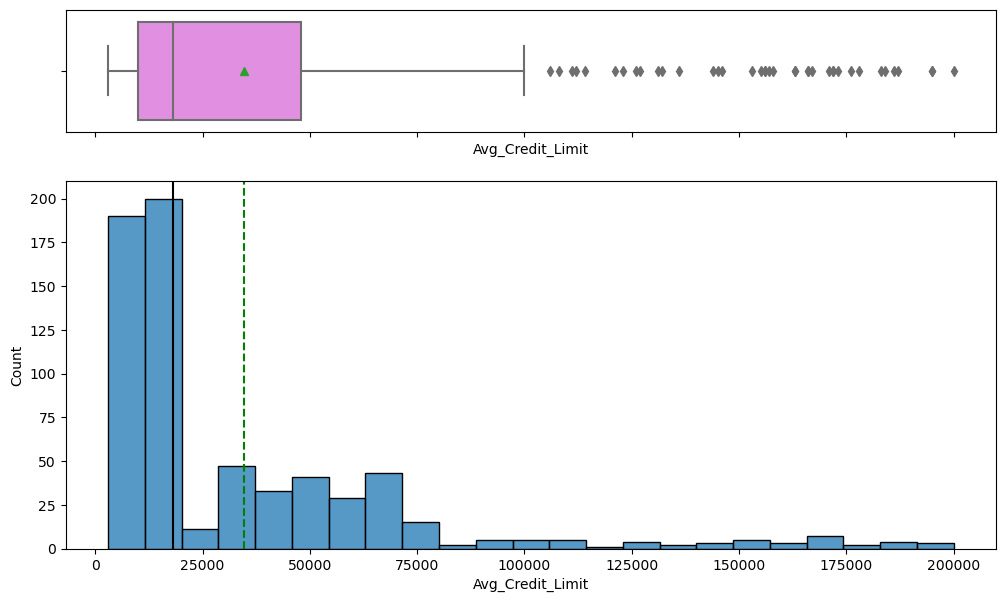

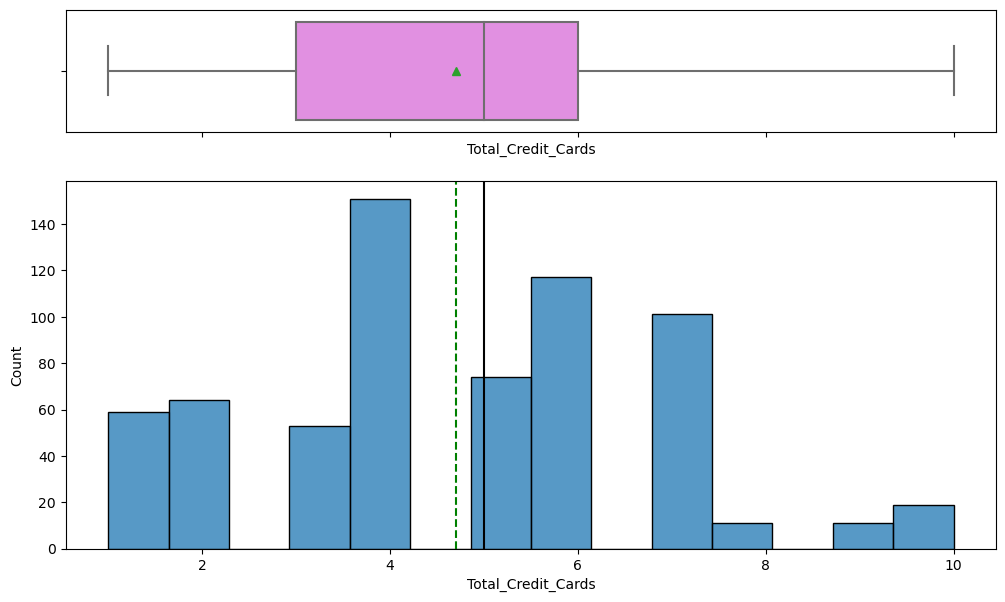

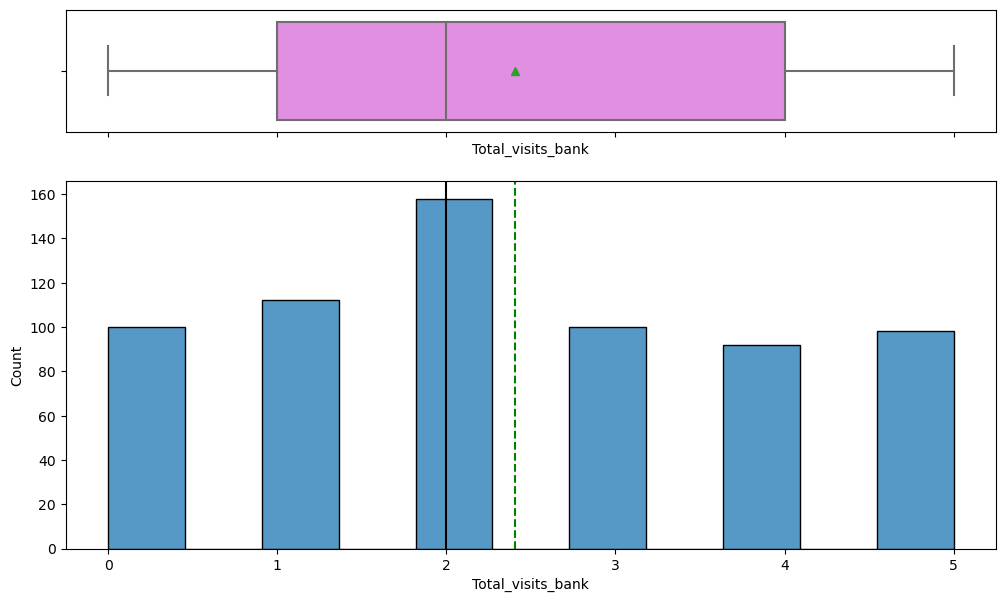

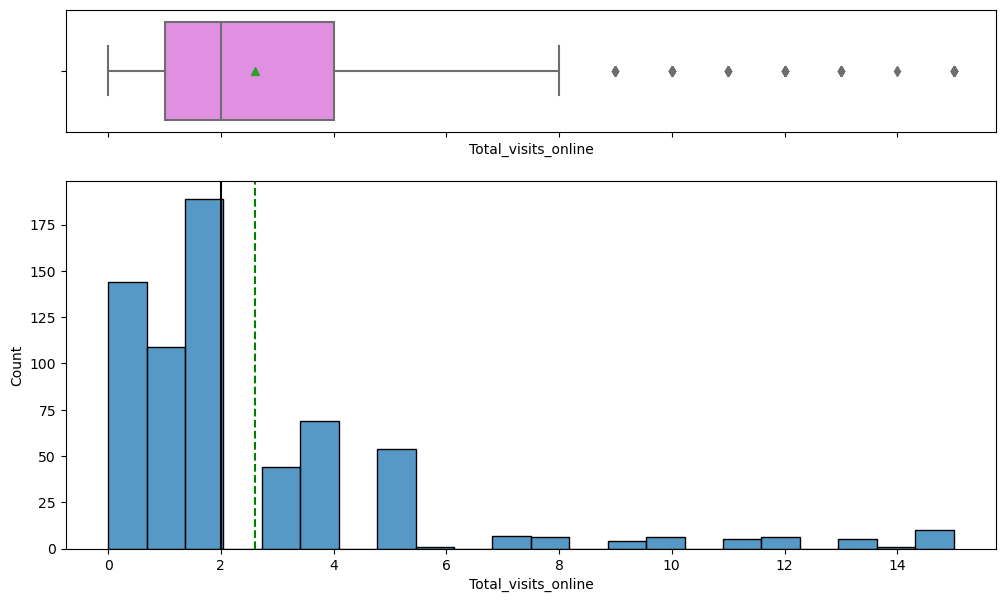

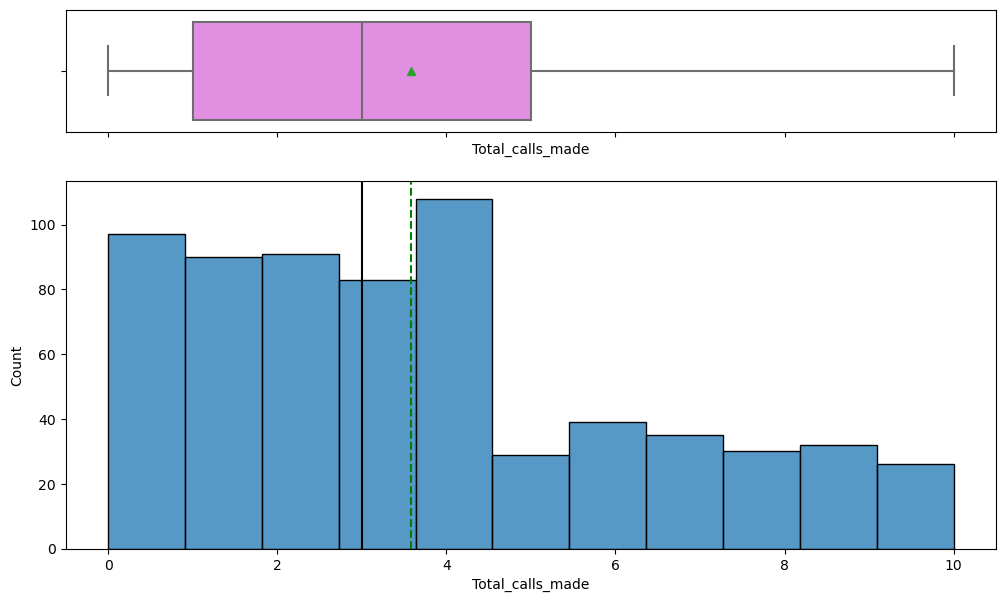

In [24]:
for col in df.columns:
    histogram_boxplot(data, col)

**Observations**
1. Avg_Credit_Limit: 
From the above graphs(boxplot and histogram) we can conclude that the average or the mean credit limit is 34574. The median is 18000, that means 50% customers have credit limit above 18000 while 50% customers have credit limit below 18000. The maximum limit of credit card is 200000, while minimum limit of credit card is 3000. We can also conclude that majority of credit card holders have credit limit below 25000. There are certain outliers where some credit card holders have limit beyond 100000 and discarding them won't makes sense as this could be valauble information, could tell us about their interaction with the bank and how many credit cards they could be holding.

2. Total_credit_cards
From the above graphs(boxplot and histogram) we can conclude that the average amount of credit cards held by customers is 5 on an average, while the median is also 5, which means 50% of the customer base holds less than 5 cards while other half holds more than 5. Minimum cards held by customers is 1 and maximum is 10. 50% of the customers hold cards between the range of 3 to 6.

3. Total_visits_bank
From the above graphs(boxplot and histogram) we can conclude that average total visits to the bank by customers were 2 visits, the median is also 2 visits, i.e. 50% of the customers visited the bank less the 2 times while the other 50% visited the bank more than 50% in person. Minimum times a customer might visit the bank is 0 while maximum would be 5 times per year. 50% of the customers visited the bank per year nearly 1 to 4 times. 

4. Total_visits_online
From the above graphs(boxplot and histogram) we can conclude that the average in terms of customers visited the site or logged in or interacted was approximatly 3 times per year. While the median value is 2, which means that 50% of the customers visited or logged in on website less than 2 times while other half did the same more than 2 times per year. Maximum time customer loggid in/visited the site was 15 times per year and minimum was 0 visits. 50% of the customers visited/loggid in on site 1 to 4 times per year. There are outliers where couple of customers have loggid on/visited the site more than 10 times, which couuld tell us how they interacted with website, in terms of use of purpose i.e. were they looking for help? were they not getting any kind of proper assistance that's why they were visiting many times?were they using our other services? was there any other reason for multiple visits?.

5. Total_calls_made
From the above graphs(boxplot and histogram) we can conclude that the average amount of times the calls were made by customers was total 3 calls/year. The median value is 3, which indicates 50% of customers made calls more than 3 times, while other half made calls less than 3 times. The minumum the calls were made were 0, while the maximum calls were made were 10 calls/year. 50% of the customers made the call between approximatly 1 to less than 5 times per year.


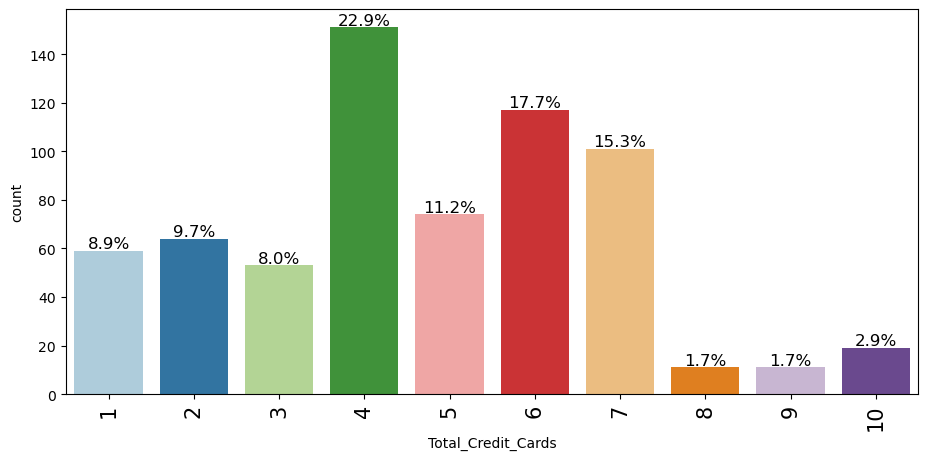

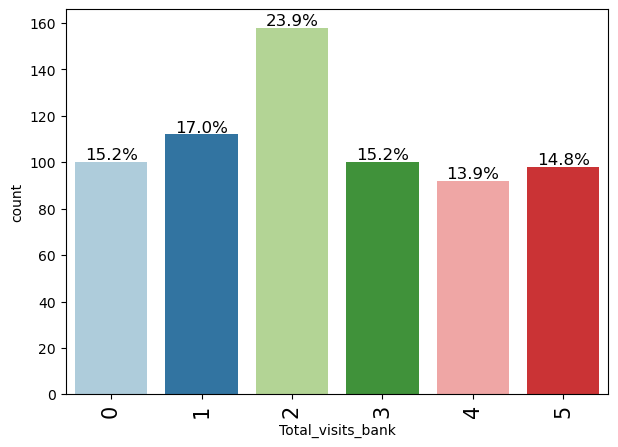

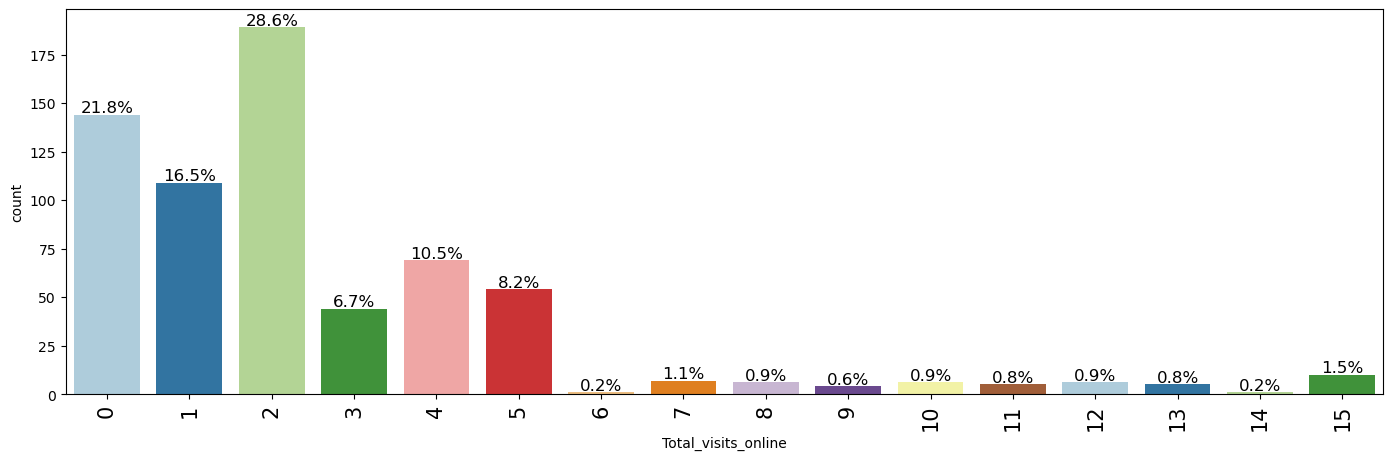

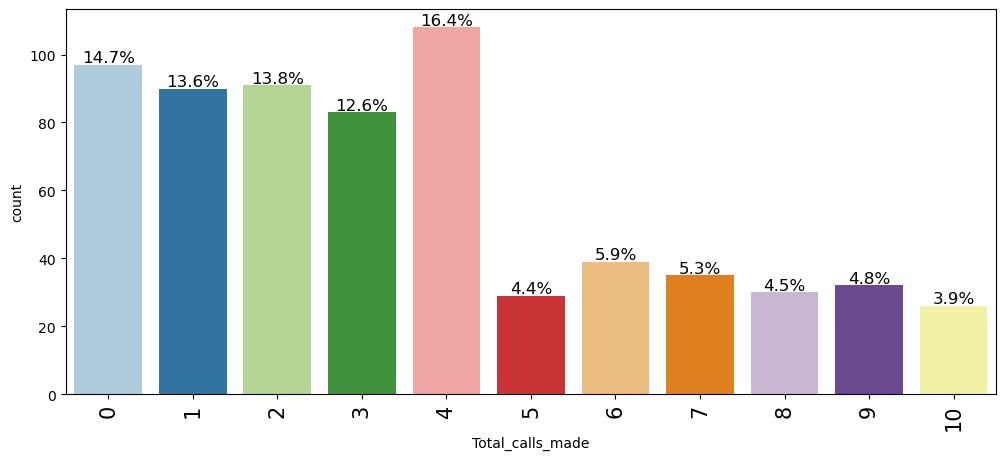

In [25]:
for col in df.columns.tolist()[1:]:
    labeled_barplot(df, col, perc=True)

**Observations**
1. Total_Credit_Cards
From the above barplot we can conclude that almost 23% of customers hold 4 credit cards, highest out of any other proportion of customers. Second almost 18% of customers hold 6 credit cards followed 15% of customers holding 7 credit cards. Total of these proportions of customer base would be approximatly 56% which hold cards between 4 to 7 in terms of number. 1 or 2 or 3 cards held by proportions of customer base is almost 9%, 10%, 8% respectivly i.e. there is not much difference between number of customers holding cards within this range. Same applies for the customer who have more than 7 cards such as customers who hold 7 or 8 or 9 cards are in proporton of customer base as almost 2%, 2%, 3% respectivly.

2. Total_visits_bank
From the above barplot we can conclude that almost 24% of customer base have visited the bank 2 times a year. Followed by customers who visited the bank only once which make up 17% of the total customer base. While those who have visited the bank 0 and 3, 4, 5 come in same proportions in terms of total customer base which is around 14% to 15%.

3. Total_visits_online
From the above barplot we can conclude that almost 30% customers have visited the site 2 times per year, followed by 22% of customers who have visited the site 0 times. Those who have done that onece a year make up about 16% of total customer base. Customers who have visited the site more than 5 times upto 15 times make around 1% to maximum 2% of total customer base. It can be concluded that alot of customers either made the visite twice a year or not at all while some did visit once or 3 to 5 times, while very few did beyond 5 times per year.

4. Total_calls_made
From the above barplot we can conclude that almost 16% customers made the call 4 times, followed by 15% who did not made any call. On the other who did make a call once, twice or thrice make up about 14%, 14%, 13% respectivly. Also who made the call more tha 4 times upto 10 times make up out of total customer base about 4% to 6%. We can conclude that majority chose to call either 4 times and did not and soem in that chose to do so either 1, 2 or 3 times per year, beyond that very few did chose to call more tham 4 times.

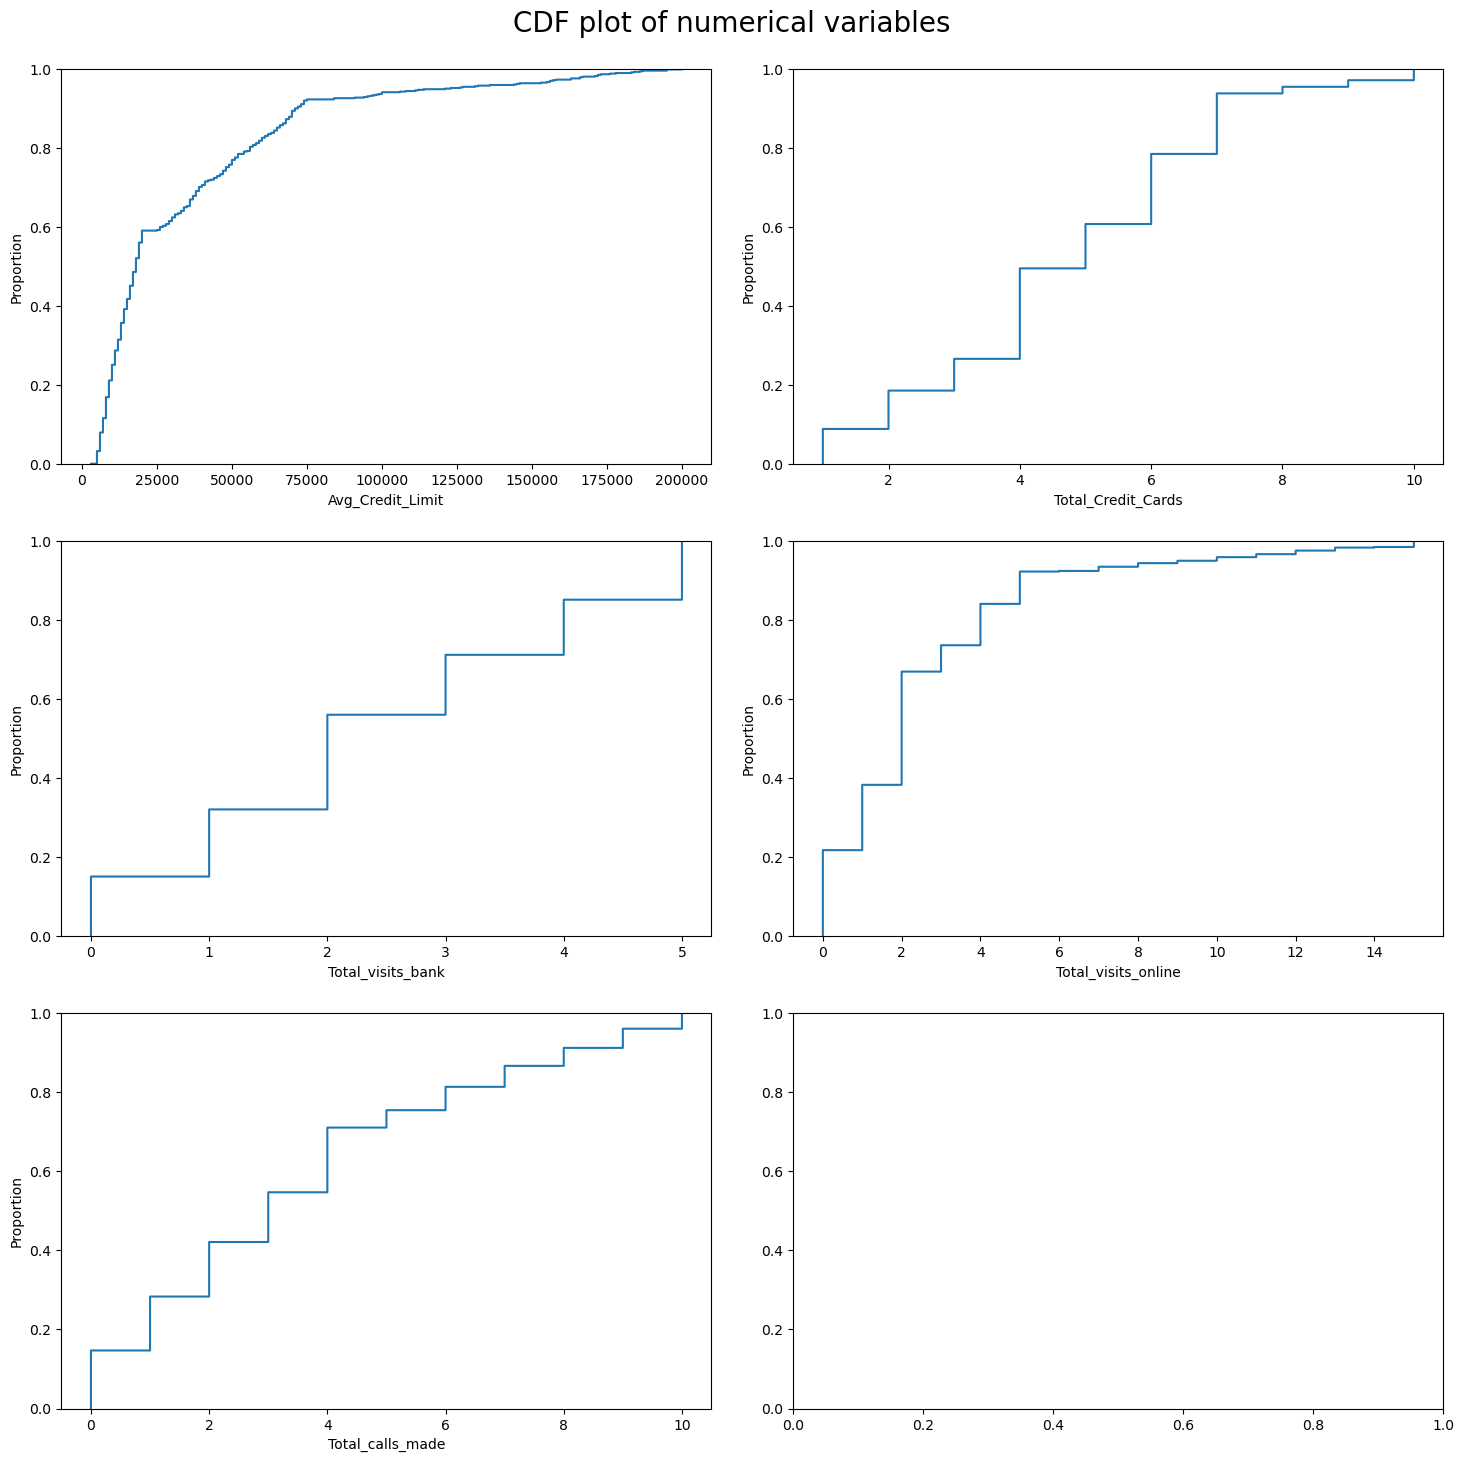

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)

counter = 0

for ii in range(3):
    sns.ecdfplot(data=df, ax=axes[ii][0], x=df.columns.tolist()[counter])
    counter = counter + 1

    if counter != 5:
        sns.ecdfplot(data=df, ax=axes[ii][1], x=df.columns.tolist()[counter])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**
1. Avg_Credit_Limit:
From the above CDF plot for Avg_Credit_Limit we can conclude that, there is a steep increase initially which suggests that a very large portion of customers have relatively low credit limits. It increases a bit approx. after 25000 but then starts flattening out after around 50000. Near the end CDF approahes 1.0 indicating the maximum credit limit among customers is 200000.

2. Total_Credit_Cards:
From the above CDF plot for Total_Credit_Cards, we can see there is a step wise increase which suggests discrete values i.e. whole numbers of credit cards. Majority of the customers have cards between 2 to 6, while some of them have 6 to 8 cards, after 8 cards there is a flattening of curve indicating very few hold 9 or 10 cards. 

3. Total_visits_bank:
From the above CDF plot for
r Total_visits_bank, we can conclude that there is a step wise increase  indication suggesting discrete values. A significant portion of customers make 0 to 4 visits, the CDF reaches near 1 at 5 visits, which means that this is the maximum visits by customers to the bank.

4. Total_visits_online:
From the above CDF plot for Total_visits_online shows more gradual increase compared to bank visits, indicating a wider distribution of online visits, large proportion of customers have upto 6 online visits. CDF flattes out after 10 visits while some customers making 15 visits per year.

5. Total_calls_made:
From the above CDF plot Total_calls_made shows a step wise increase. Significant portion of customers make 1 to 6 calls, the CDF approaches 1 at 10 calls, suggesting that is the maximum number of calls made by customers.



### Bivariate Analysis

**Let's check for correlations.**

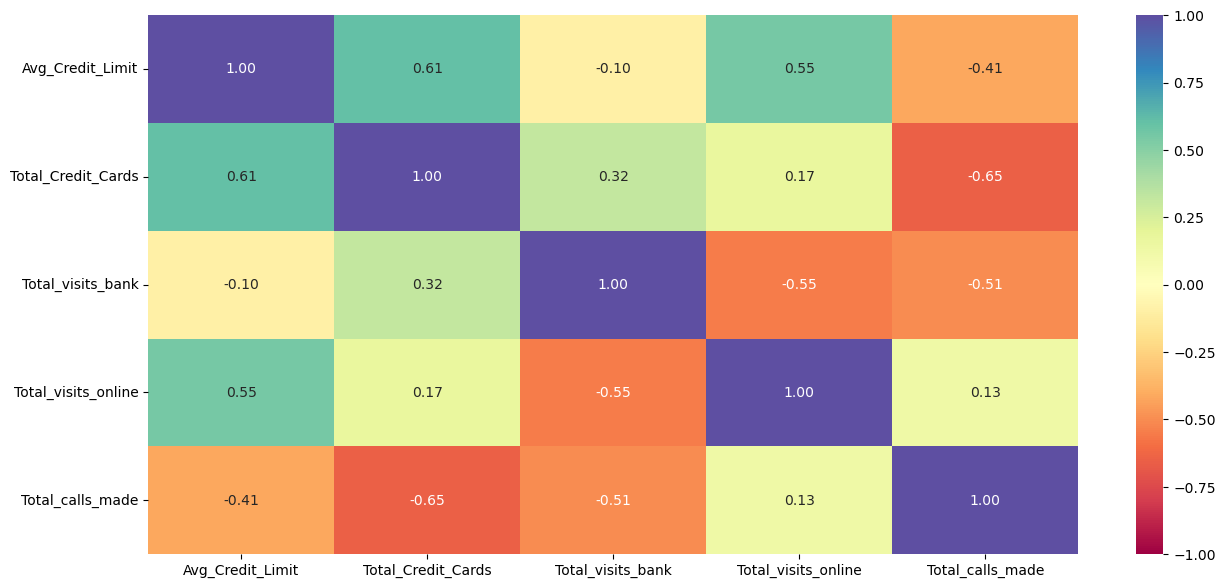

In [34]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")    
plt.show()

**Observations**

- From the above heatmap we can conclude the following:
1. Avg_Credit_Limit vs Total_Credit_Cards (0.61):
There is a strong positive correlation between Avg_Credit_Limit and Total_Credit_Cards, this suggests that customers with higher average credit limits tends to hold more credit cards.

2. Avg_Credit_Limit vs Total_visits_online (0.55):
There is a moderate positive correlation between Avg_Credit_Limit and Total_visits_online, which suggests that customers with higher credit card limit tends to visis the site more often.

3. Avg_Credit_Limit vs Total_calls_made (-0.41):
There is a moderate negative correlation between Avg_Credit_Limit and Total_calls_made i.e. customers with higher average credit limit tends to make fewer calls

4. Total_Credit_Cards vs Total_calls_made (-0.65):
There is a strong negative corrolation between Total_Credit_Cards and Total_calls_made which means customers with more credit cards tend to make fewer calls.

5. Total_visits_bank vs Total_visits_online (-0.55):
There is a moderate negative correlation between Total_visits_bank and Total_visits_online which means that customer who visit the bank more frequently tend to visit online less often.

6. Total_visits_bank vs Total_calls_made (-0.51):
There is a moderate negative correlation between Total_visits_bank and Total_calls_mad which indicates that customers who visit bank more frequently tend to tend to make fewer calls.

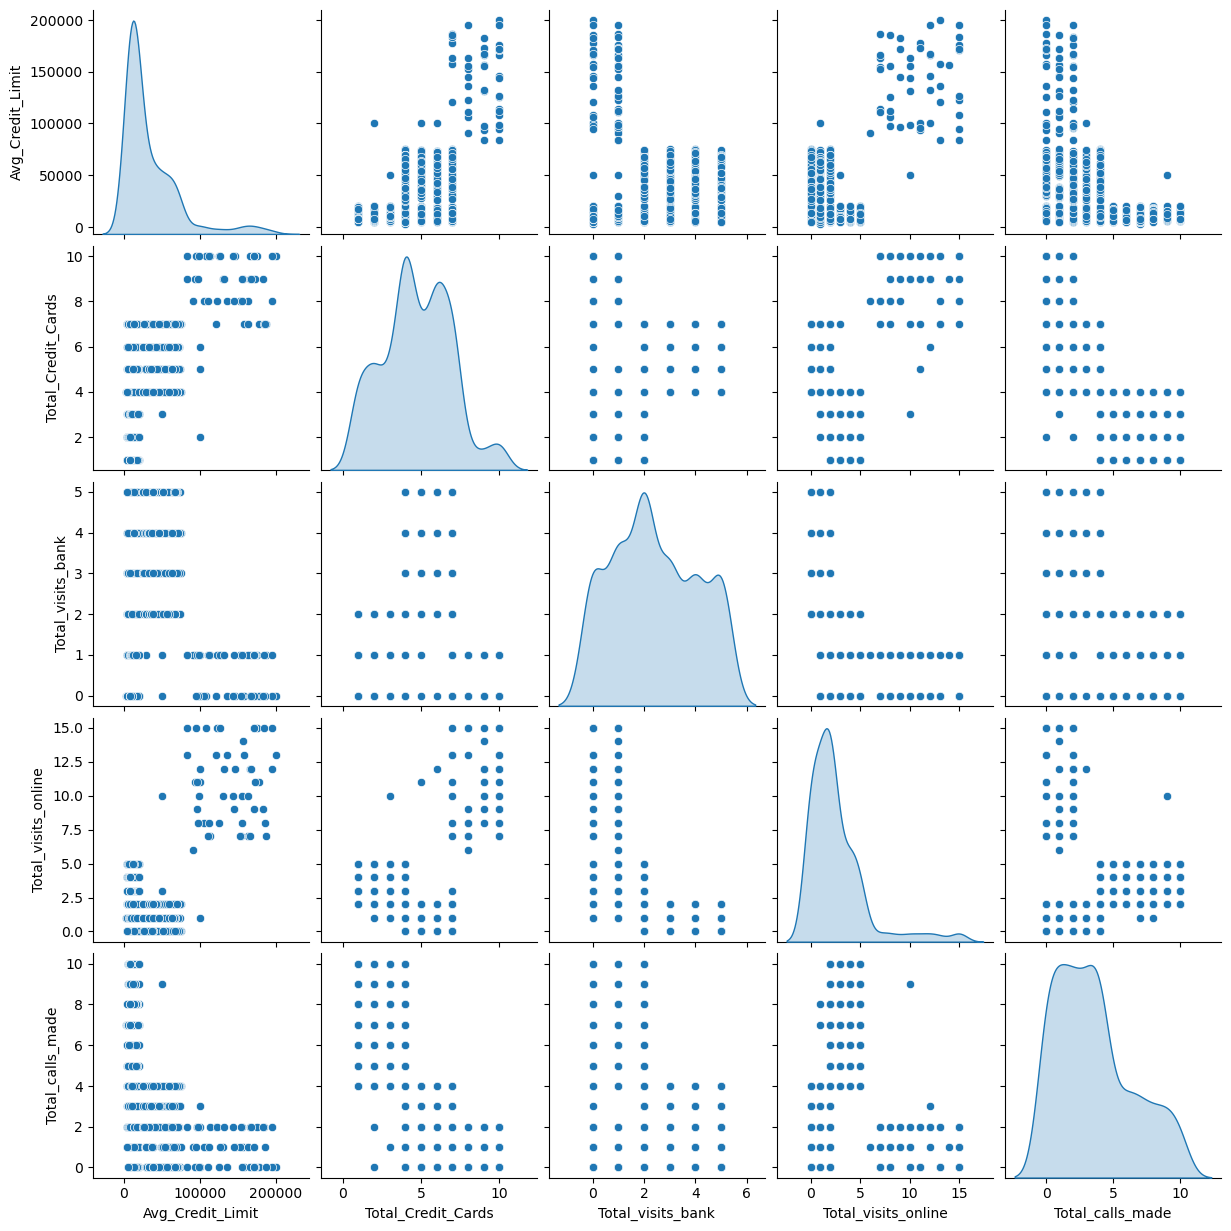

In [36]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

**Observations**

-From the above heatmap we can conclude the following:
1. Customers with higher credit limits tend to engage more online visits and less with traditional channels (calls).

2. Customers with more credit cards tend to visit the bank more often but make fewer calls, indicating a preference for face-to-face or live interactions over phone calls.

3. There is a trade-off between bank visits and online visits, suggesting that customers tend to chose one mode of interaction over the other.

4. The distributions and scatter plots show some outliers, particularly in Avg_Credit_Limit and Total_visits_online, which may be indication of a small group of high-value or highly engaged customers.

**We can add a hue and see if we can see some clustered distributions.**

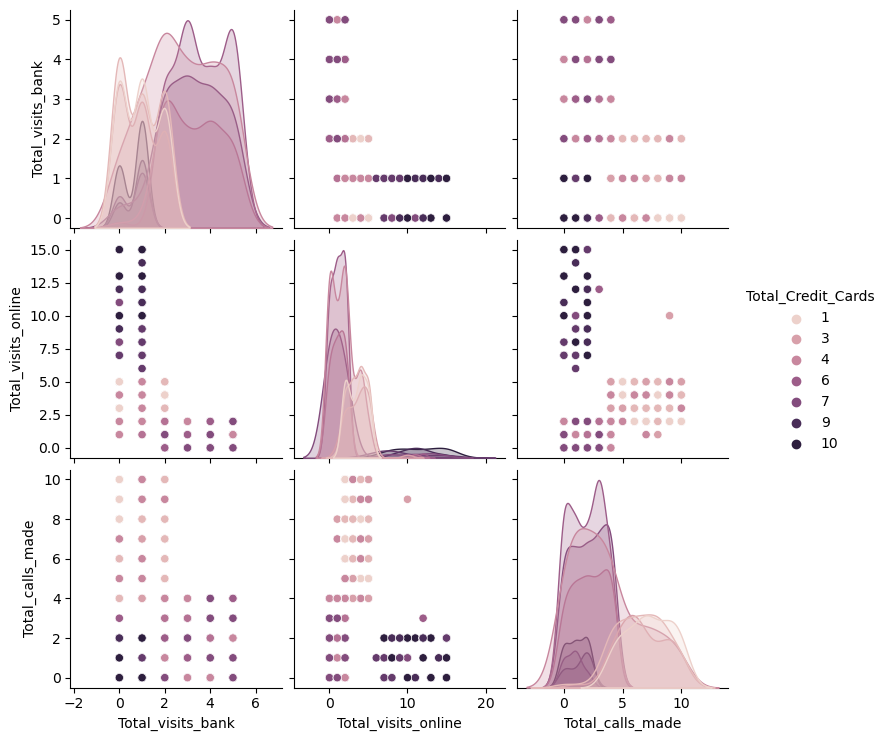

In [40]:
sns.pairplot(
    data=df[
        [
            "Total_visits_bank",
            "Total_visits_online",
            "Total_calls_made",
            "Total_Credit_Cards",
        ]
    ],
    hue="Total_Credit_Cards",
)

plt.show()

**Observations**



**Let's visualize the modes of contacting the bank in a 3D plot.**

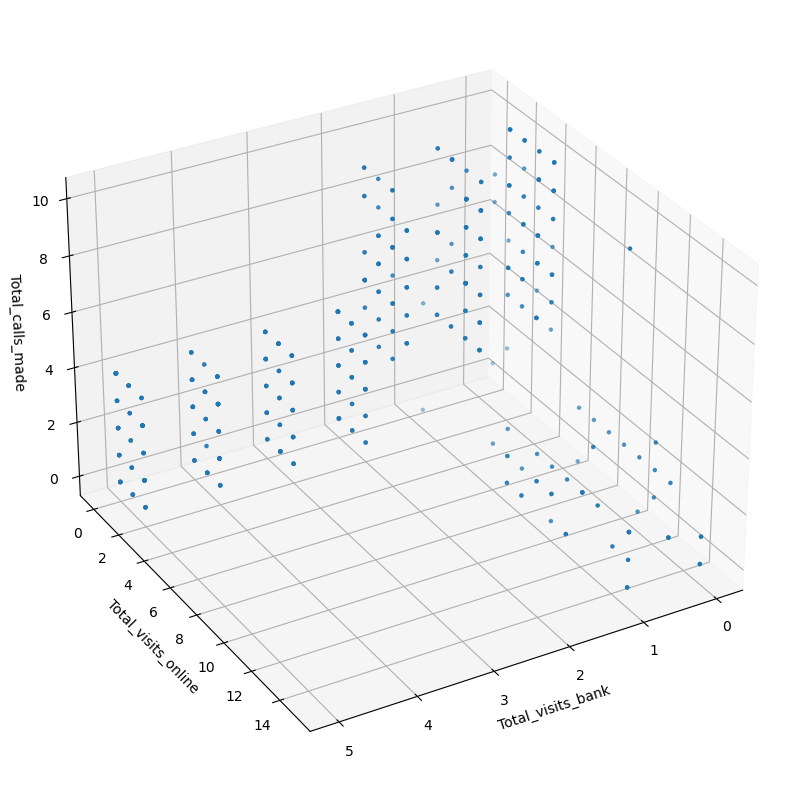

In [38]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

x = df["Total_visits_bank"]
y = df["Total_visits_online"]
z = df["Total_calls_made"]

ax.scatter(x, y, z, marker=".")

ax.set_xlabel("Total_visits_bank")
ax.set_ylabel("Total_visits_online")
ax.set_zlabel("Total_calls_made")

ax.view_init(azim=60)

plt.show()

- We can observe three segments of the customers by their preferred mode of contacting the bank.

## Data Preprocessing

### Outlier Detection

In [39]:
threshold = 3

outlier = {}

for col in df.columns:
    i = df[col]
    mean = np.mean(df[col])
    std = np.std(df[col])
    list1 = []
    for v in i:
        z = (v - mean) / std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

print("The following are the outliers in the data:")
for key, value in outlier.items():
    print("\n", key, ":", value)

The following are the outliers in the data:

 Avg_Credit_Limit : [153000, 155000, 156000, 156000, 157000, 158000, 163000, 163000, 166000, 166000, 167000, 171000, 172000, 172000, 173000, 176000, 178000, 183000, 184000, 186000, 187000, 195000, 195000, 200000]

 Total_Credit_Cards : []

 Total_visits_bank : []

 Total_visits_online : [12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

 Total_calls_made : []


**Observations**
1. Regarding Avg_Credit_Limit:
From the outlier data obtain from Avg_Credit_Limit suggests that significant higher credit limits compared to rest of the customer base, which could mean that these customers may have higher income or great credit history, may indicate great and loyal relationship with the bank.

2. Regarding Total_visits_online:
From the outlier data obtain from Total_visits_online we can conclude that customers with significant online interaction compared to the others, having stronger preference for online banking, maybe much more comfortable with using technology to do banking compared to other customers. This also suggests that frequent monitoring of transactions, accounts or utilization of online services such as transfer and bill payments. Thus these customers must be adressed with robut online customer support whenever they need.

### Scaling

In [42]:
scaler = StandardScaler() 
subset = df.copy()  
subset_scaled = scaler.fit_transform(subset)  

In [45]:
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)  

In [46]:
subset_scaled_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


## K-means Clustering

In [47]:
k_means_df = subset_scaled_df.copy()

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [50]:
wss =[]

a=[1,2,3,4,5,6,7,8,9,10]

sil_score= []

for i in a:
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(k_means_df)
    wss.append(KM.inertia_)

### Checking Elbow Plot

Text(0, 0.5, 'WSS')

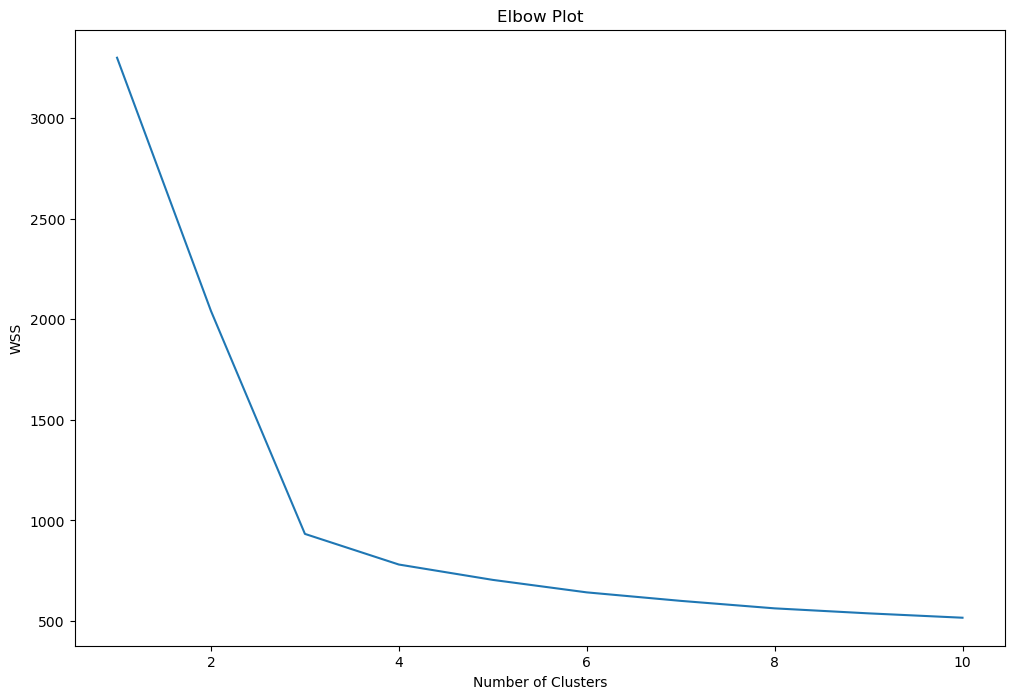

In [58]:
plt.figure(figsize=(12,8))
plt.plot(a, wss)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')

In [60]:
wss

[3300.0,
 2040.989816478495,
 933.0437490000535,
 780.7736895551768,
 704.4759188657505,
 642.4285451423207,
 600.2307262933779,
 562.9699837327826,
 538.1073332196183,
 516.4200301863627]

### Checking Silhouette Scores

In [62]:
ss = {1: 0}

for i in range(2, 11):
    clusterer = KMeans(n_clusters=i, init='k-means++', random_state=1)
    y = clusterer.fit_predict(subset_scaled_df.copy())  
    s = silhouette_score(subset_scaled_df, y)  
    ss[i] = round(s, 5)
    print("The Average Silhouette Score for {} clusters is {}".format(i, round(s, 5)))

The Average Silhouette Score for 2 clusters is 0.41842
The Average Silhouette Score for 3 clusters is 0.51572
The Average Silhouette Score for 4 clusters is 0.35567
The Average Silhouette Score for 5 clusters is 0.27175
The Average Silhouette Score for 6 clusters is 0.25591
The Average Silhouette Score for 7 clusters is 0.24791
The Average Silhouette Score for 8 clusters is 0.22705
The Average Silhouette Score for 9 clusters is 0.21339
The Average Silhouette Score for 10 clusters is 0.21381


Text(0.5, 0, 'Number of clusters')

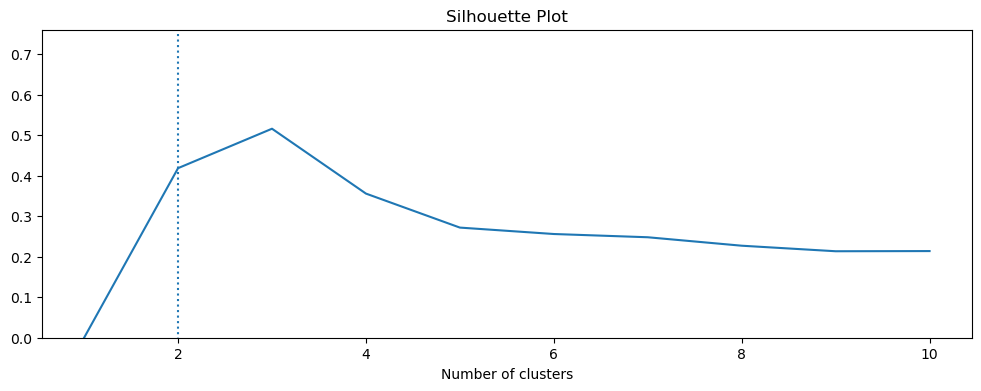

In [64]:
maxkey= [key for key, value in ss.items() if value == max(ss.values())][0]

fig,ax = plt.subplots(figsize=(12,4))
plt.plot(list(ss.keys()),list(ss.values()))
plt.vlines(x=maxkey-1,ymax=0,ymin=0.75,linestyles='dotted')
ax.set(ylim=(0, 0.76))
ax.set_title('Silhouette Plot')
ax.set_xlabel('Number of clusters')

In [65]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=1)   

kmeans.fit_predict(subset_scaled_df)  

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [66]:
df1 = df.copy()

k_means_df["K_means_segments"] = kmeans.labels_
df1["K_means_segments"] = kmeans.labels_

In [68]:
df1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


### Cluster Profiling

In [69]:
df1.K_means_segments.nunique(1)*100 

300

In [71]:
df1.K_means_segments.value_counts(1)*100

K_means_segments
0    58.484848
1    33.939394
2     7.575758
Name: proportion, dtype: float64

In [73]:
df1.K_means_segments.describe() 

count    660.000000
mean       0.490909
std        0.634068
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: K_means_segments, dtype: float64

In [74]:
df1.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
 5   K_means_segments     660 non-null    int32
dtypes: int32(1), int64(5)
memory usage: 28.5 KB


In [75]:
clust_profile=df1

clust_profile=clust_profile.groupby('K_means_segments').mean()

clust_profile['freq']=df1.K_means_segments.value_counts().sort_index()

np.round(clust_profile,2).T

K_means_segments,0,1,2
Avg_Credit_Limit,33782.38,12174.11,141040.00
Total_Credit_Cards,5.52,2.41,8.74
Total_visits_bank,3.49,0.93,0.60
Total_visits_online,0.98,3.55,10.90
Total_calls_made,2.00,6.87,1.08
freq,386.00,224.00,50.00


## Hierarchical Clustering

In [76]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [78]:
methods = ['single', 'complete', 'average', 'ward']
s = {}
for method in methods:
    linkage_matrix = linkage(df, method=method) 
    linkage_matrices[method] = linkage_matrices  

In [79]:
df.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

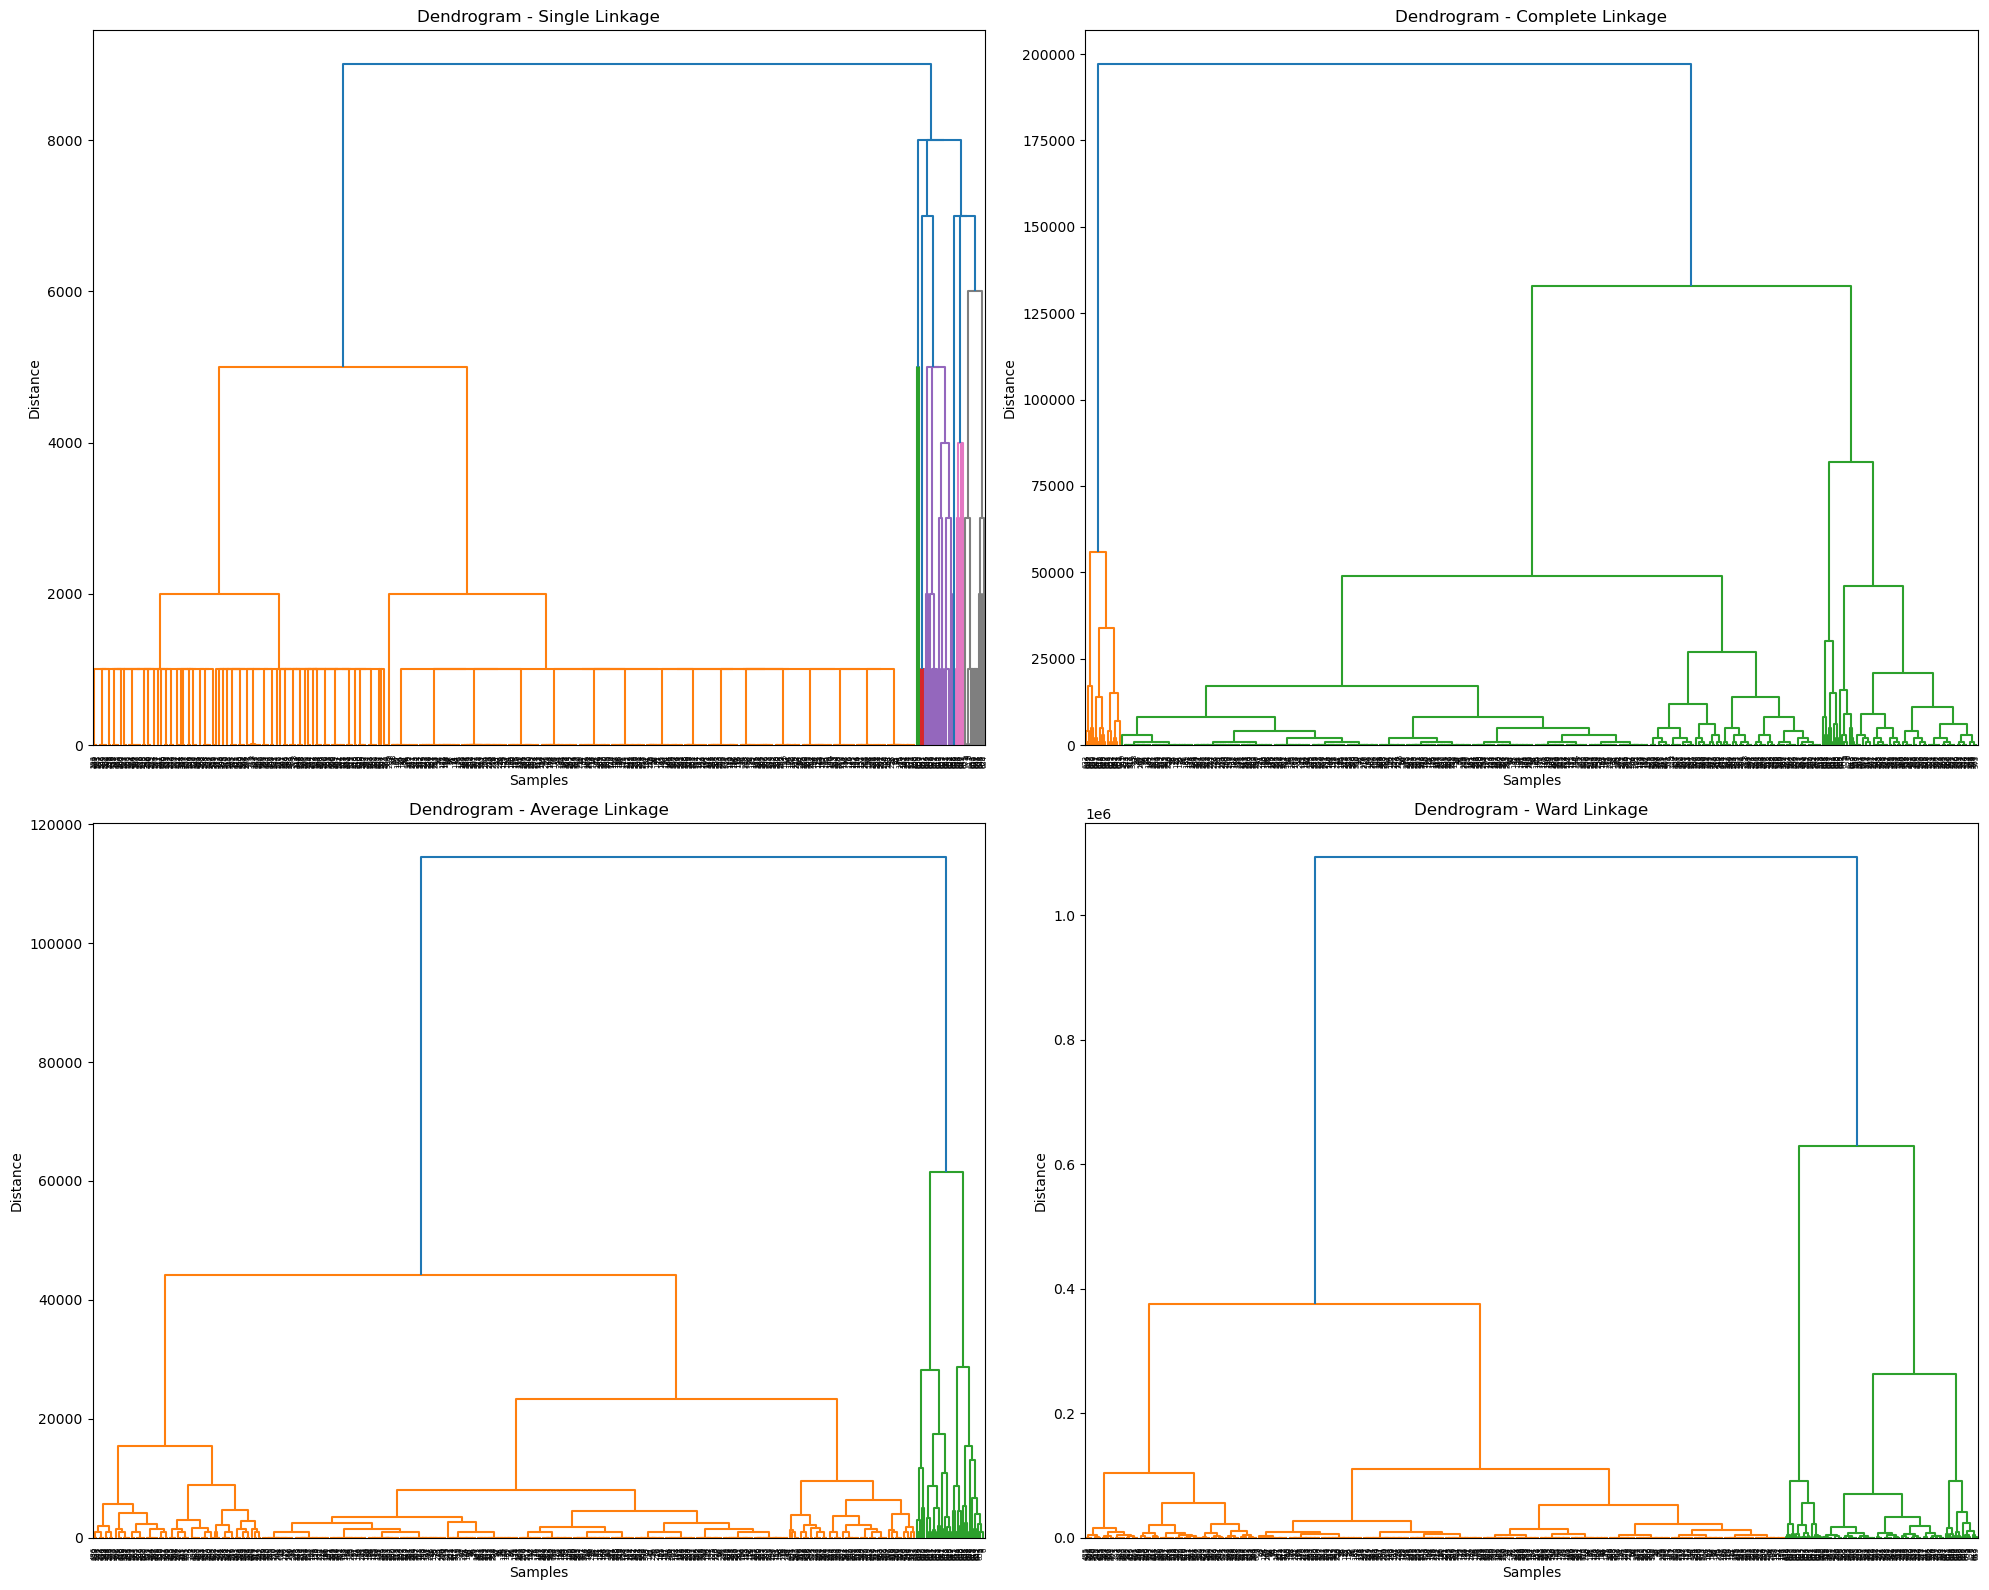

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

df = df.astype(np.float64)

methods = ['single', 'complete', 'average', 'ward']
linkage_matrices = {}

for method in methods:
    linkage_matrix = linkage(df, method=method)  
    linkage_matrices[method] = linkage_matrix  

plt.figure(figsize=(20, 16))
for method, linkage_matrix in linkage_matrices.items():
    plt.subplot(2, 2, methods.index(method) + 1)
    dendrogram(linkage_matrix, orientation='top') 
    plt.title(f'Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
plt.tight_layout()
plt.show()


#### Lets check silhouette score

In [93]:
from sklearn.cluster import AgglomerativeClustering

hc_df = subset_scaled_df.copy()

sil_score_hc = []
cluster_list = list(range(2, 10))

for n_clusters in cluster_list:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')    
    preds = clusterer.fit_predict(subset_scaled_df)
    score = silhouette_score(hc_df, preds)
    sil_score_hc.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41770414762100305
For n_clusters = 3, silhouette score is 0.5147639589978429
For n_clusters = 4, silhouette score is 0.34808225812635757
For n_clusters = 5, silhouette score is 0.2569177732677479
For n_clusters = 6, silhouette score is 0.22677849725582772
For n_clusters = 7, silhouette score is 0.21629686854896069
For n_clusters = 8, silhouette score is 0.2186949061939919
For n_clusters = 9, silhouette score is 0.1952707466913215


### Creating final model

In [94]:
%%time
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")  
HCmodel.fit(hc_df)

CPU times: total: 15.6 ms
Wall time: 23 ms


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [95]:
df2 = df.copy()

hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [96]:
hc_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_segments
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2


In [97]:
df2.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_segments
0,100000.0,2.0,1.0,1.0,0.0,0
1,50000.0,3.0,0.0,10.0,9.0,1
2,50000.0,7.0,1.0,3.0,4.0,0
3,30000.0,5.0,1.0,1.0,4.0,0
4,100000.0,6.0,0.0,12.0,3.0,2


In [98]:
subset_scaled_df['HC_Clusters'] = HCmodel.labels_
df['HC_Clusters'] = HCmodel.labels_

## Cluster Profiling and Comparison

### Cluster Profiling: K-means Clustering

In [102]:
km_cluster_profile = df1.groupby("K_means_segments").mean()
km_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K_means_segments,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,141040.000000,8.740000,0.600000,10.900000,1.080000


In [103]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Avg_Credit_Limit"].count().values 
)

In [105]:
km_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


### Cluster Profiling: Hierarchical Clustering

In [110]:
hc_cluster_profile = df2.groupby("HC_segments").mean() 


In [115]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Avg_Credit_Limit"].count().values)  

In [116]:
hc_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_segments,,,,,,
0,33851.948052,5.516883,3.493506,0.979221,1.994805,385
1,12151.111111,2.422222,0.937778,3.546667,6.857778,225
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


### K-means vs Hierarchical Clustering

In [117]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


In [118]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_segments,,,,,,
0,33851.948052,5.516883,3.493506,0.979221,1.994805,385
1,12151.111111,2.422222,0.937778,3.546667,6.857778,225
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<Axes: xlabel='K_means_segments'>

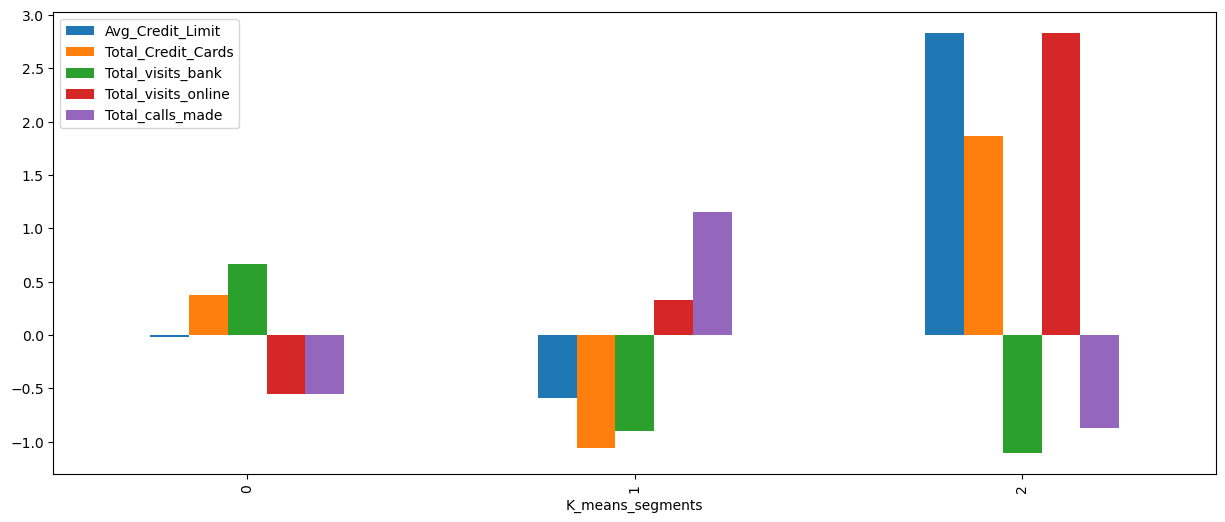

In [121]:
k_means_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6)) 

<Axes: xlabel='HC_segments'>

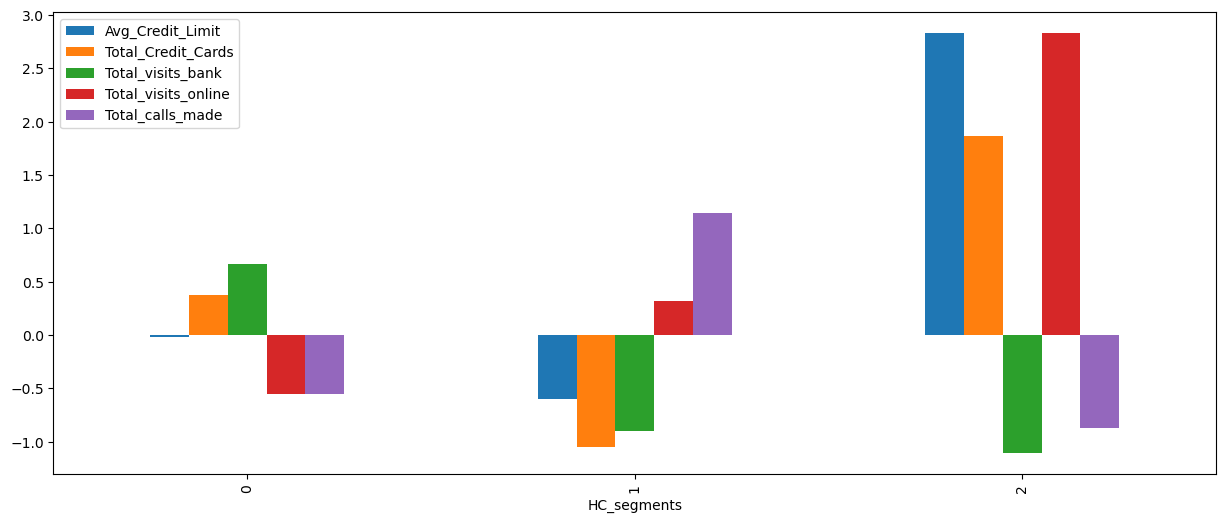

In [123]:
hc_df.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))  

**Observations**



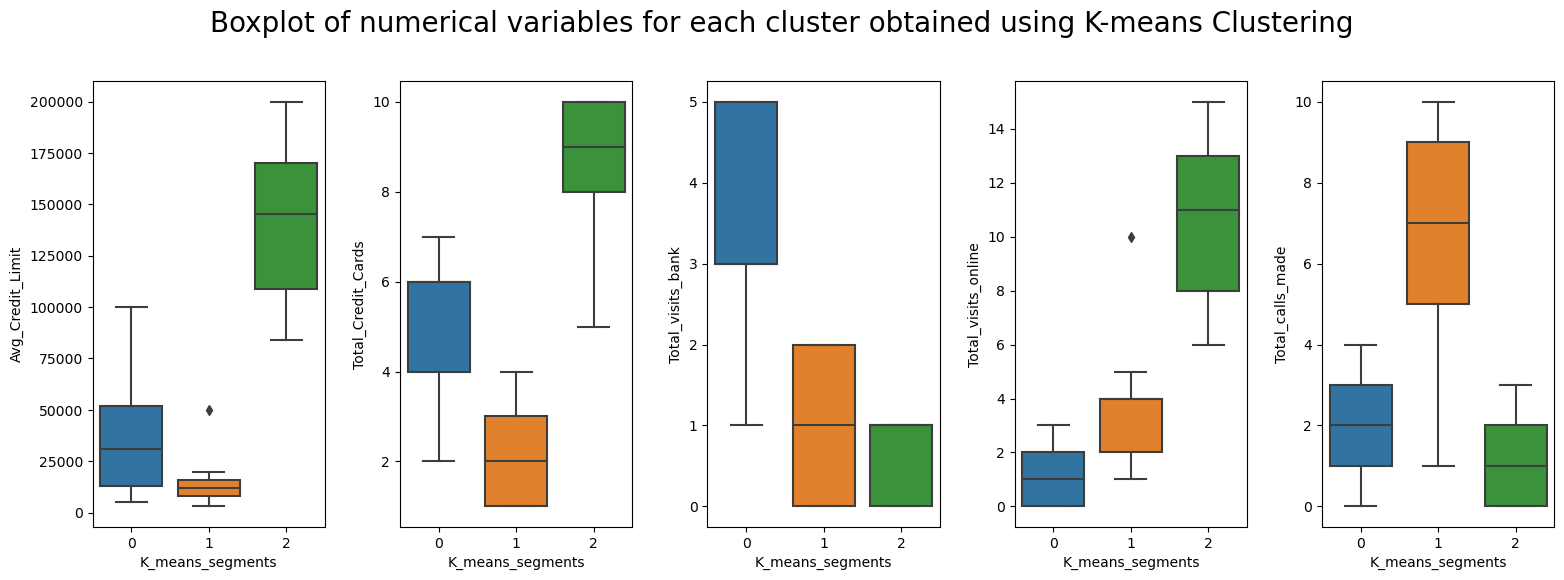

In [124]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using K-means Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(
        ax=axes[ii], y=df1[df1.columns[counter]], x=k_means_df["K_means_segments"]
    ) 
    counter = counter + 1

fig.tight_layout(pad=2.0) 

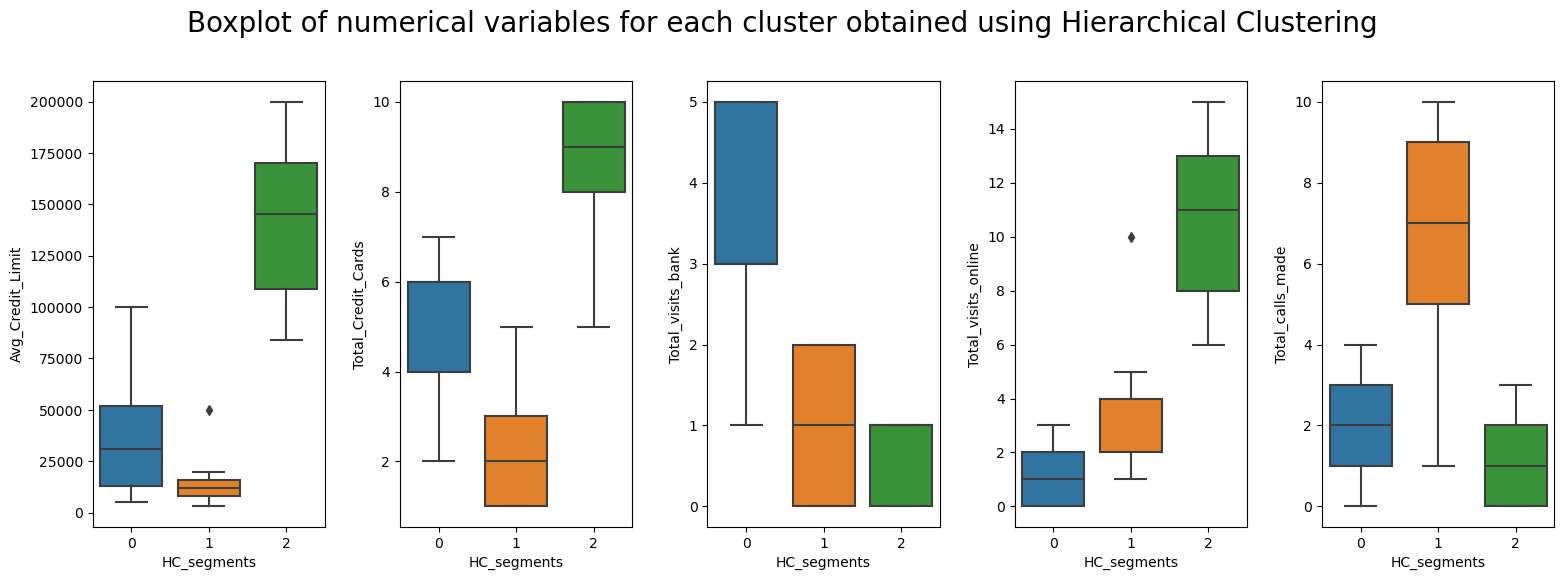

In [126]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using Hierarchical Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df2[df2.columns[counter]], x=hc_df["HC_segments"]) 
    counter = counter + 1

fig.tight_layout(pad=2.0)

## PCA

## Bartletts Test of Sphericity
#### Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

> $H_O$: All variables in the data are uncorrelated

> $H_A$: At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable.

In [127]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(subset_scaled_df)
p_value

0.0

so we can reject the null hypothesis since p_value(0.0) < 0.05

## KMO Test
#### The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

>Generally, if MSA is less than *0.5*, PCA is not recommended, since no reduction is expected. On the other hand, *MSA > 0.7* is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [128]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(subset_scaled_df)
kmo_model

0.7180132209905522

resonable adequacy

### Step 1- Create the covariance Matrix

In [129]:
from sklearn.decomposition import PCA

pca = PCA(random_state=123)  
df_pca = pca.fit_transform(subset_scaled_df)  

In [130]:
pd.DataFrame(np.round(pca.get_covariance(),2),columns=subset_scaled_df.columns,index=subset_scaled_df.columns)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters
Avg_Credit_Limit,1.00,0.61,-0.10,0.55,-0.41,0.23
Total_Credit_Cards,0.61,1.00,0.32,0.17,-0.65,-0.08
Total_visits_bank,-0.10,0.32,1.00,-0.55,-0.51,-0.47
Total_visits_online,0.55,0.17,-0.55,1.00,0.13,0.54
Total_calls_made,-0.41,-0.65,-0.51,0.13,1.00,0.26
HC_Clusters,0.23,-0.08,-0.47,0.54,0.26,0.40


### Step 2- Get eigen values and eigen vector

In [135]:
eigenvec = pca.components_  
print('Eigenvectors:', np.round(eigenvec, 2))

Eigenvectors: [[-0.27 -0.52 -0.48  0.17  0.58  0.23]
 [ 0.55  0.3  -0.35  0.61 -0.07  0.33]
 [ 0.02 -0.25 -0.66 -0.31 -0.63 -0.08]
 [-0.23  0.74 -0.44 -0.32  0.32 -0.1 ]
 [-0.75  0.18  0.02  0.5  -0.38  0.12]
 [ 0.05 -0.06 -0.14  0.39  0.09 -0.9 ]]


In [136]:
eigenvalues = pca.explained_variance_  
print('Eigenvalues:', np.round(eigenvalues, 2))

Eigenvalues: [2.33 2.18 0.32 0.28 0.25 0.05]


In [138]:
var_exp = np.round(pca.explained_variance_ratio_, 2) * 100  

In [139]:
var_exp

array([43., 40.,  6.,  5.,  5.,  1.])

### Step 3 View Scree Plot to identify the number of components to be built

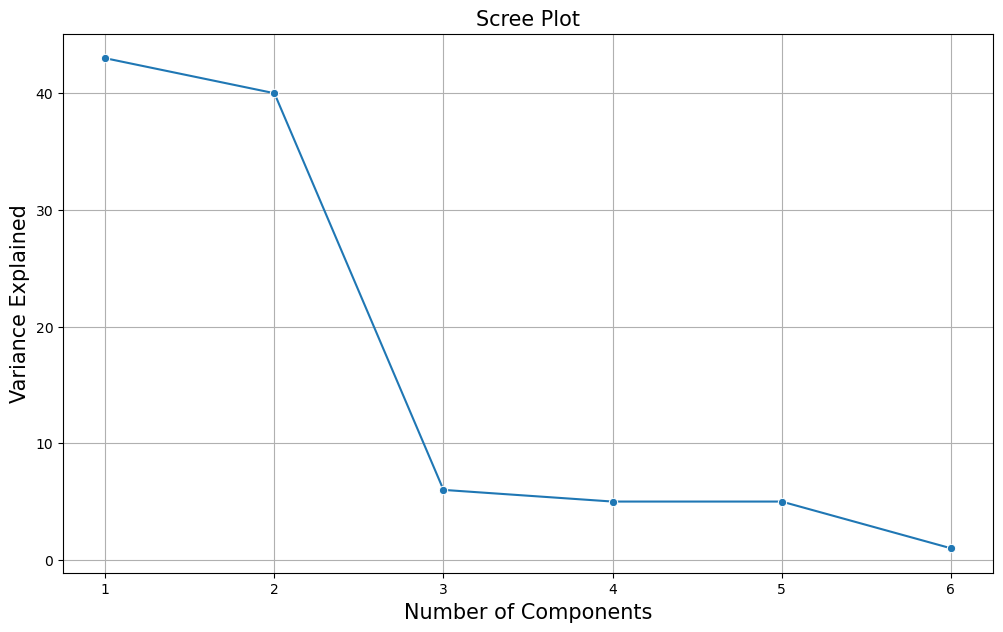

In [140]:
plt.figure(figsize=(12, 7))
sns.lineplot(y=var_exp, x=range(1, len(var_exp) + 1), marker='o')
plt.xlabel('Number of Components', fontsize=15)
plt.ylabel('Variance Explained', fontsize=15)
plt.title('Scree Plot', fontsize=15)
plt.grid()
plt.show() 

### Step 4 Apply PCA for the number of decided components (n=2)

In [142]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)  

df_pca = pca.fit_transform(subset_scaled_df)

df_pca.transpose() 

array([[-0.35576078,  2.65667863, -0.25611274, ..., -0.98892453,
        -1.52152243, -0.7166506 ],
       [ 0.49447317,  2.07482131,  0.75630897, ...,  4.26280292,
         6.2028015 ,  5.53705454]])

In [144]:
df_pca_loading = pd.DataFrame(pca.components_, columns=list(subset_scaled_df), index=['PC0', 'PC1'])  
df_pca_loading.shape

(2, 6)

In [145]:
df_pca_loading = np.round(df_pca_loading, 2)

In [146]:
df_pca_loading.style.highlight_max(color='lightgreen', axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters
PC0,-0.270000,-0.520000,-0.480000,0.170000,0.580000,0.230000
PC1,0.550000,0.300000,-0.350000,0.610000,-0.070000,0.330000


### Linear equation of first PC

In [147]:
for i in range(0, 6):
    print("(", np.round(pca.components_[0][i], 2), ")", '*', df_pca_loading.columns[i], end=' + ')  

( -0.27 ) * Avg_Credit_Limit + ( -0.52 ) * Total_Credit_Cards + ( -0.48 ) * Total_visits_bank + ( 0.17 ) * Total_visits_online + ( 0.58 ) * Total_calls_made + ( 0.23 ) * HC_Clusters + 

### Linear equation of second PC

In [148]:
for i in range(0, 6):
    print("(", np.round(pca.components_[1][i], 2), ")", '*', df_pca_loading.columns[i], end=' + ')  

( 0.55 ) * Avg_Credit_Limit + ( 0.3 ) * Total_Credit_Cards + ( -0.35 ) * Total_visits_bank + ( 0.61 ) * Total_visits_online + ( -0.07 ) * Total_calls_made + ( 0.33 ) * HC_Clusters + 

### Variance captured by PCs

In [149]:
reduced_data_df_pca = pd.DataFrame( 
    data=df_pca, columns=["Component 1", "Component 2"]
)

print(
    f"The first two principal components explain {np.round(100*pca.explained_variance_ratio_.sum(), 2)}% of the variance in the data."
)

The first two principal components explain 83.41% of the variance in the data.


### Visualization of clusters formed

<Axes: xlabel='Component 1', ylabel='Component 2'>

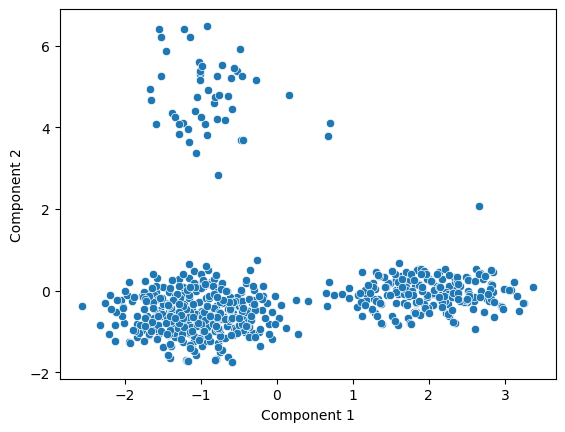

In [151]:
sns.scatterplot(data=reduced_data_df_pca, x="Component 1", y="Component 2")  

<Axes: xlabel='Component 1', ylabel='Component 2'>

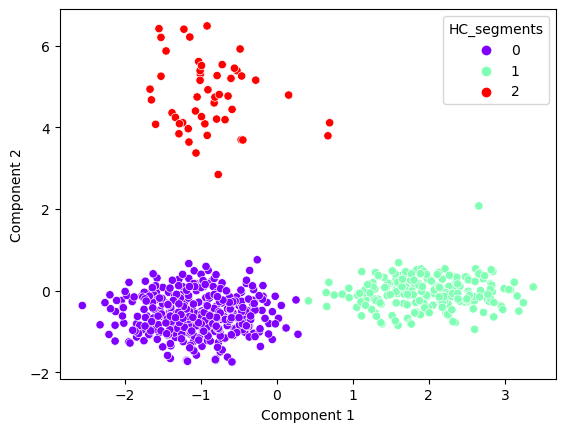

In [152]:
sns.scatterplot(
    data=reduced_data_df_pca,
    x="Component 1",
    y="Component 2",  
    hue=df2["HC_segments"],
    palette="rainbow",
)

___